In [1]:
#!pip install yfinance

In [2]:
from tfiers.nb import *

Preloading: numpy, matplotlib.pyplot, pandas, seaborn.
Imported `np`, `mpl`, `plt`, `sns`, `pd`


In [3]:
import yfinance

In [133]:
ticker = yfinance.Ticker("SPY")
price = ticker.history(period="max")['Close'];

In [134]:
T = 4  # in business days
price_T_days_ago = price.shift(T);

In [135]:
buy = price <= price_T_days_ago;

So, I want: every first buy day
-> np.diff == 1

In [136]:
first_buy_day = buy.astype(float).diff() == 1;

In [137]:
# check (for period=1y)
# Wide steps are caused by weekends I think. Cause actual array has no consecutive true days (i.e. it's correct).

# buy.astype(float).plot(drawstyle="steps");
# first_buy_day.astype(float).divide(2).plot(drawstyle="steps");

In [138]:
day_after_first_buy_day = first_buy_day.shift(1).fillna(False); # first day is nan, ofc

In [139]:
price[first_buy_day]

Date
1993-02-09     26.393753
1993-03-12     26.652357
1993-03-19     26.741098
1993-03-24     26.648321
1993-04-02     26.184397
                 ...    
2020-12-21    367.859985
2021-01-04    368.790009
2021-01-14    378.459991
2021-01-26    383.790009
2021-02-19    390.029999
Name: Close, Length: 782, dtype: float64

In [140]:
price[day_after_first_buy_day]

Date
1993-02-10     26.430716
1993-03-15     26.781643
1993-03-22     26.592657
1993-03-25     26.815344
1993-04-05     26.314287
                 ...    
2020-12-22    367.239990
2021-01-05    371.329987
2021-01-15    375.700012
2021-01-27    374.410004
2021-02-22    387.529999
Name: Close, Length: 782, dtype: float64

In [141]:
p0 = price[first_buy_day].to_numpy()
p1 = price[day_after_first_buy_day].to_numpy()

next_day_growth = (p1 - p0) / p0;

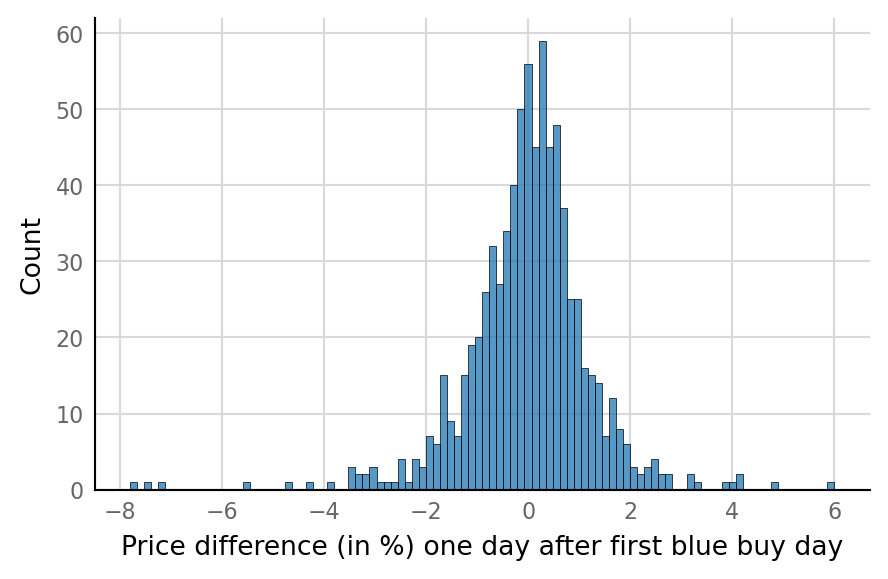

In [142]:
sns.histplot(next_day_growth * 100, bins=100);
plt.xlabel("Price difference (in %) one day after first blue buy day");

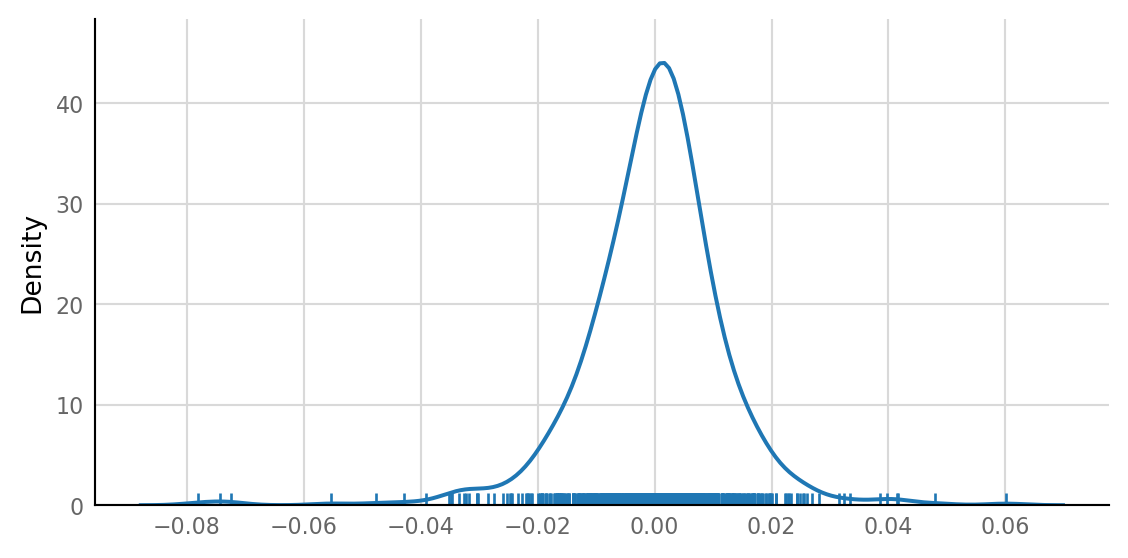

In [151]:
sns.displot(next_day_growth, rug=True, kind='kde', aspect=2, height=3);

Chance of regret:

In [143]:
np.sum(next_day_growth > 0) / np.size(next_day_growth)

0.5179028132992327